In [1]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as pt
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [3]:
df.shape

(7728394, 46)

In [4]:
len(df)

7728394

In [5]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


# ASK QUESTIONS.
1. Which City in US has reported most no. of Accident Cases in last 5 years (2016-2020) ?
2. Which are the top 10 accident prone streets in US ?
3. Per Day averagely how many road accidents took placed in US ?
4. In which hours of the day most accidents happened in US ?
5. How are the basic weather conditions in most of the accident cases in US ?
6. Which are the top 10 States with most no. of road accident cases in US ?
7. Which Timezone got the most no. of accidents?
8. Calculate the no. of high accident(>1000) and low accident cities(<1000)?
9. For how many cases the impact of accident on traffic is moderate(severity-2)?
10. In last 6 years which street got the most no. of accidents, also calculate average accidents per day?
11. Show that Sunday got the least no. of accidents among week, also calculate day of week with most accidents?
12. Which month range got most accident cases?
13. what is the effect of bumper on accidents?
14. what is the weather conditions when these accident occur?

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
len(df.columns)

46

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


# DATA CLEANING

In [11]:
missing_percentage= (pd.isnull(df).sum().sort_values(ascending = False)/len(df))*100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

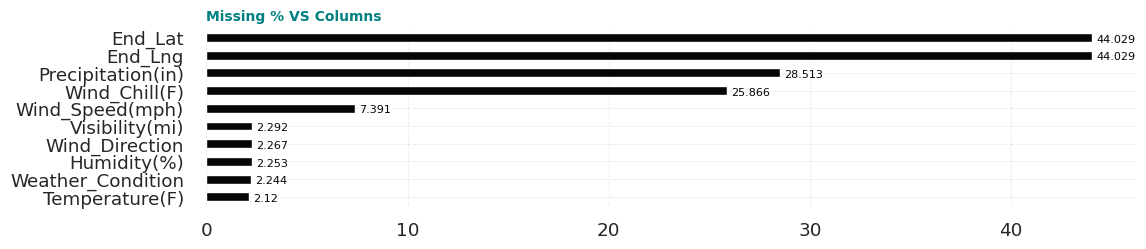

In [194]:
# Create a figure and axis with a specific figsize
fig, ax = plt.subplots(figsize=(12, 2.3))

# Plot the data (missing_percentage) as a horizontal bar chart for non-zero values
missing_percentage[missing_percentage != 0].head(10).plot(kind="barh", color='#050505')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values by inverting the y-axis
ax.invert_yaxis()

# Add annotation (values) to the bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round(i.get_width(), 3)), fontsize=8, fontweight='light', 
             color='#050505')

# Add a title to the plot
ax.set_title('Missing % VS Columns', loc='left',fontsize=10, fontweight='bold', color='#008080')

# Show the plot
plt.show()

In [13]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

#### Converting dtype of Start_Time and End_time to Timestamp 

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')

In [15]:
df['End_Time'] = pd.to_datetime(df['End_Time'],format='ISO8601')

In [16]:
df.Start_Time[105]

Timestamp('2016-02-11 09:31:23')

In [18]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int32

In [93]:
sns.set_style("white")

#### Analysing Month VS Accident graph for year 2016-2023

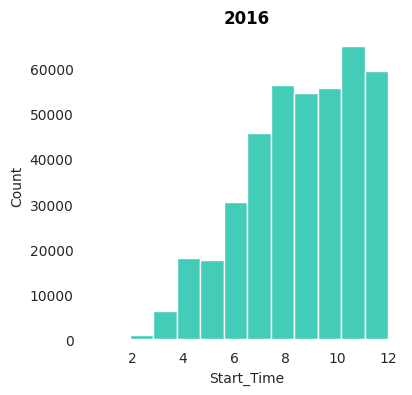

In [20]:
Year2016 = df.Start_Time[df.Start_Time.dt.year==2016]
data=Year2016.dt.month

fig, ax = plt.subplots(figsize=(4,4))

sns.histplot(data, color= '#04BCA1',bins=12, kde=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

plt.title('2016',color='#050505',fontsize=12, fontweight='bold')
plt.show()

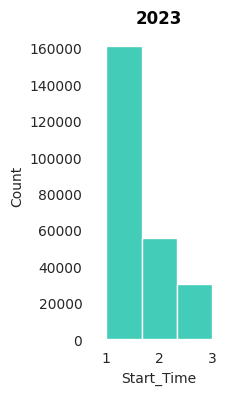

In [21]:
Year2023 = df.Start_Time[df.Start_Time.dt.year==2023]
data=Year2023.dt.month

fig, ax = plt.subplots(figsize=(1.5,4))

sns.histplot(data, color= '#04BCA1',bins=3, kde=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

plt.title('2023',color='#050505',fontsize=12, fontweight='bold')
plt.show()

#### As we can see from above two graphs, some of the month data is missing for year 2016 and 2023, so we have to drop every value for year 2016 and 2023 to have more accurate analysis.

#### Therefore, from here US Accident analysis wiil be done for year 2017-2022

In [22]:
df.drop(df[(df.Start_Time.dt.year==2016)].index, inplace=True)
len(df)

7317573

In [23]:
df.drop(df[(df.Start_Time.dt.year==2023)].index, inplace=True)
len(df)

7070940

## Handling null values

In [26]:
df_sorted = df.sort_values(by='Start_Time')
df=df_sorted.reset_index()

In [27]:
df['Wind_Speed(mph)']

0           3.5
1           3.5
2           4.6
3           8.1
4           NaN
           ... 
7070935     0.0
7070936     0.0
7070937     0.0
7070938    14.0
7070939     0.0
Name: Wind_Speed(mph), Length: 7070940, dtype: float64

In [28]:
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].interpolate()
df['Wind_Speed(mph)'].head(10)

0    3.50
1    3.50
2    4.60
3    8.10
4    7.18
5    6.26
6    5.34
7    4.42
8    3.50
9    4.65
Name: Wind_Speed(mph), dtype: float64

In [29]:
df['Humidity(%)'] = df['Humidity(%)'].interpolate()
df['Pressure(in)'] = df['Pressure(in)'].interpolate()
df['Precipitation(in)'] = df['Precipitation(in)'].interpolate()
df['Visibility(mi)'] = df['Visibility(mi)'].interpolate()
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].interpolate()

In [30]:
df['Wind_Direction'] = df['Wind_Direction'].fillna(method='ffill', limit=10)
df['Weather_Condition'] = df['Weather_Condition'].fillna(method='ffill', limit=10)

In [31]:
df.fillna('unknown', inplace=True)

In [32]:
missing= (pd.isnull(df).sum().sort_values(ascending = False)/len(df))*100
missing.head()

index                0.0
No_Exit              0.0
Wind_Direction       0.0
Wind_Speed(mph)      0.0
Precipitation(in)    0.0
dtype: float64

# EXPLORATORY ANALYSIS AND VISUALISATION
    (US ACCIDENTS 2017-2022)

In [33]:
df.columns

Index(['index', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### ANALYSIS ON CITIES

In [34]:
cities = df.City.unique()
cities

array(['Pomfret Center', 'Norwalk', 'Hartford', ..., 'Henley', 'Hilham',
       'Rudy'], dtype=object)

In [35]:
len(cities)

13501

In [36]:
Cities_by_accidents = df.City.value_counts().reset_index()
p=pd.DataFrame(Cities_by_accidents)
p

,City,count
0,Miami,176532
1,Houston,151771
2,Los Angeles,135547
3,Charlotte,132140
4,Dallas,115797
...,...,...
13496,Campbellsport,1
13497,Medimont,1
13498,Russia,1
13499,North Bennington,1


In [37]:
p[p['City'] == 'New York'].index[0]+1

44

#### Despite being the most populated, New York is at 44th place 

In [38]:
Cities_by_accidents = df.City.value_counts()

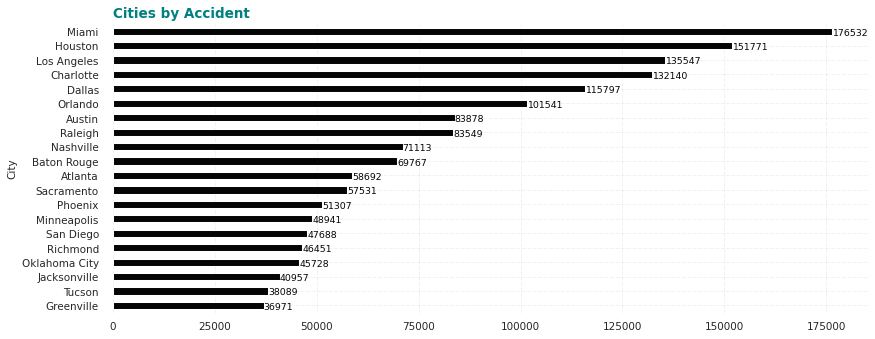

In [39]:
# Create a figure and axis with a specific figsize
fig, ax = plt.subplots(figsize=(13, 5),dpi=75)

# Plot the data (missing_percentage) as a horizontal bar chart for non-zero values
Cities_by_accidents[:20].plot(kind="barh", color='#050505')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values by inverting the y-axis
ax.invert_yaxis()

# Add annotation (values) to the bars
for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y() + 0.5, str(round(i.get_width(), 3)), fontsize=9, fontweight='light', 
             color='#050505')

# Add a title to the plot
ax.set_title('Cities by Accident', loc='left',fontsize=13, fontweight='bold', color='#008080')

# Show the plot
plt.show()

In [40]:
Cities_by_accidents_percentage = round(Cities_by_accidents*100/len(df),2)
Cities_by_accidents_percentage[:10]

City
Miami          2.50
Houston        2.15
Los Angeles    1.92
Charlotte      1.87
Dallas         1.64
Orlando        1.44
Austin         1.19
Raleigh        1.18
Nashville      1.01
Baton Rouge    0.99
Name: count, dtype: float64

In [49]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index()
city_df

,City,count
0,Miami,176532
1,Houston,151771
2,Los Angeles,135547
3,Charlotte,132140
4,Dallas,115797
...,...,...
13496,Campbellsport,1
13497,Medimont,1
13498,Russia,1
13499,North Bennington,1


In [50]:
print(round(city_df['count']/6))

0        29422.0
1        25295.0
2        22591.0
3        22023.0
4        19300.0
          ...   
13496        0.0
13497        0.0
13498        0.0
13499        0.0
13500        0.0
Name: count, Length: 13501, dtype: float64


In [51]:
print(round(city_df['count']/(365*6)))

0        81.0
1        69.0
2        62.0
3        60.0
4        53.0
         ... 
13496     0.0
13497     0.0
13498     0.0
13499     0.0
13500     0.0
Name: count, Length: 13501, dtype: float64


####  
- In past 6 years (2017-2022) yearly 29422 road accidents (average) happened in Miami.
- In Miami averagely in every 24 hours 81 accidents occurred.
####    

In [52]:
top_10_cities = pd.DataFrame(city_df.head(10))
top_10_cities

,City,count
0,Miami,176532
1,Houston,151771
2,Los Angeles,135547
3,Charlotte,132140
4,Dallas,115797
5,Orlando,101541
6,Austin,83878
7,Raleigh,83549
8,Nashville,71113
9,Baton Rouge,69767


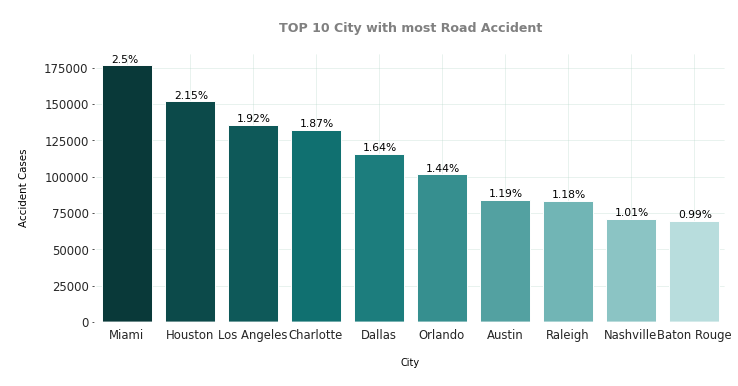

In [53]:
fig, ax = plt.subplots(figsize = (15,5), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=city_df['count'].head(10), x=city_df['City'].head(10), palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+2000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='black')

plt.ylim(-2000, 200000)
plt.title('\nTOP 10 City with most Road Accident\n', size=13, color='grey',fontweight='bold')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nCity\n', fontsize=10, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=10.5, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(left=0.2, right=0.8)

In [54]:
bottom_10_cities = pd.DataFrame(city_df.tail(10))
bottom_10_cities

,City,count
13491,Tidioute,1
13492,Deshler,1
13493,Fluker,1
13494,Gap Mills,1
13495,Skowhegan,1
13496,Campbellsport,1
13497,Medimont,1
13498,Russia,1
13499,North Bennington,1
13500,Rudy,1


Text(10, 0.00137, 'Distribution of TOP 100 Cities by Accidents')

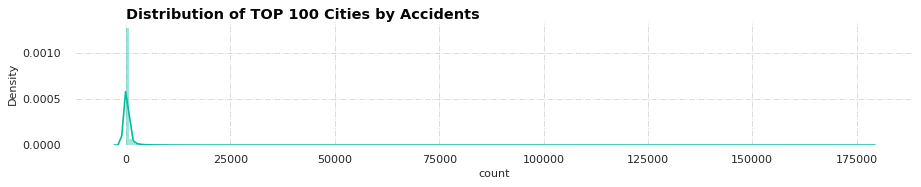

In [55]:
fig, ax = plt.subplots(figsize=(13.5, 2),dpi=80)

sns.histplot(
    Cities_by_accidents, kde=True,
    stat="density", kde_kws=dict(cut=5),
    alpha=0.4, edgecolor=(1, 1, 1, .4), color= '#04BCA1',binwidth=700
)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(color='grey', linestyle='-.', linewidth=0.8, alpha=0.3)

plt.text(10, 0.00137, 'Distribution of TOP 100 Cities by Accidents',color='#050505',fontsize=13, fontweight='bold')

#### Let put this graph into log scale to have better distribution

Text(10, 0.00137, 'Distribution of TOP 100 Cities by Accidents')

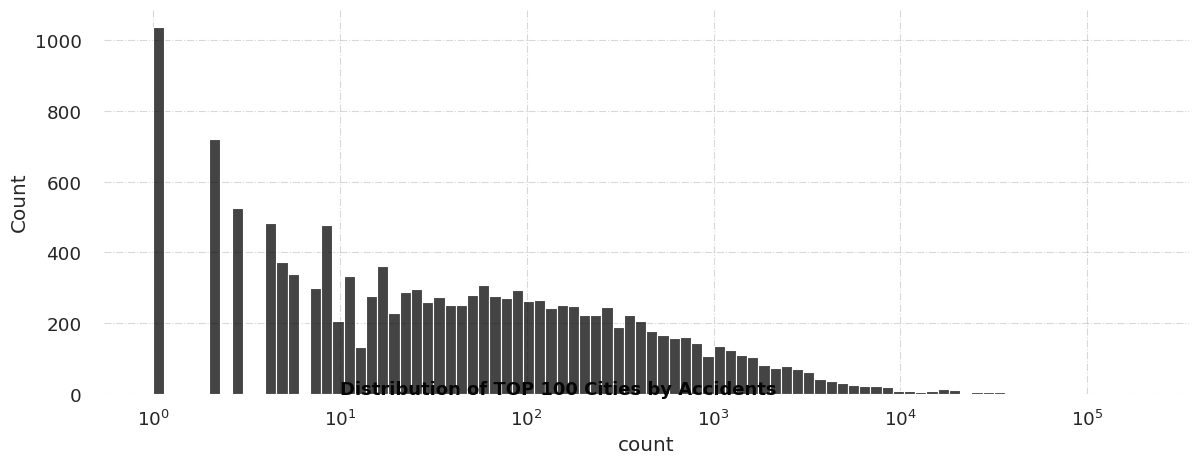

In [172]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.histplot(Cities_by_accidents, log_scale = True, color= '#050505',binwidth=0.06)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(color='grey', linestyle='-.', linewidth=0.8, alpha=0.3)

In [57]:
#Cities reported only 1 accident
Cities_by_accidents[Cities_by_accidents==1].value_counts()

count
1    1036
Name: count, dtype: int64

In [58]:
Cities_by_accidents[Cities_by_accidents==1].value_counts()*100/len(cities)

count
1    7.673506
Name: count, dtype: float64

In [59]:
#Cities reported more than 10000 accident
Cities_by_accidents[Cities_by_accidents>10000]

City
Miami          176532
Houston        151771
Los Angeles    135547
Charlotte      132140
Dallas         115797
                ...  
Hayward         11124
York            11046
Montgomery      10936
Cleveland       10789
Stockton        10230
Name: count, Length: 93, dtype: int64

In [60]:
Cities_by_accidents[Cities_by_accidents>10000].value_counts().sum()*100/len(cities)

0.6888378638619361

In [61]:
high_accident_cities=Cities_by_accidents[Cities_by_accidents>=1000]
low_accident_cities=Cities_by_accidents[Cities_by_accidents<1000]
high_accident_cities.value_counts().sum()

1151

In [62]:
low_accident_cities.value_counts().sum()

12350

In [63]:
# % of high accident cities
len(high_accident_cities)*100/len(cities)

8.52529442263536

Text(10, 0.000665, 'Distribution of High Accidents cities')

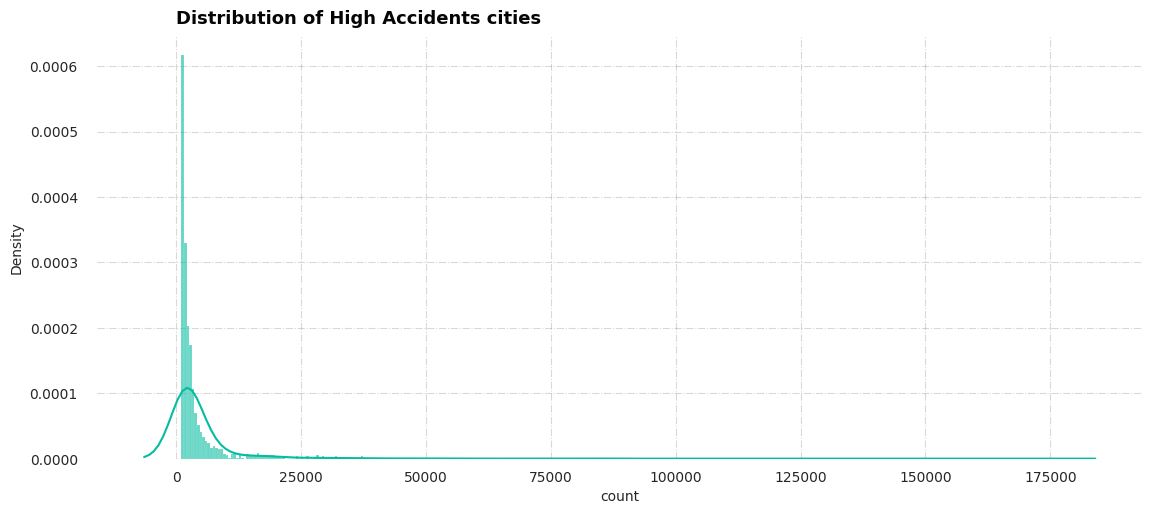

In [64]:
fig, ax = plt.subplots(figsize=(13.5, 5.5))

sns.histplot(
    high_accident_cities, kde=True,
    stat="density", kde_kws=dict(cut=2.5),
    alpha=0.6, edgecolor=(1, 1, 1, .4), color= '#04BCA1',binwidth=520
)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(color='grey', linestyle='-.', linewidth=0.8, alpha=0.3)

plt.text(10, 0.000665, 'Distribution of High Accidents cities',color='#050505',fontsize=13, fontweight='bold')

Text(10, 0.0765, 'Distribution of Low Accidents cities')

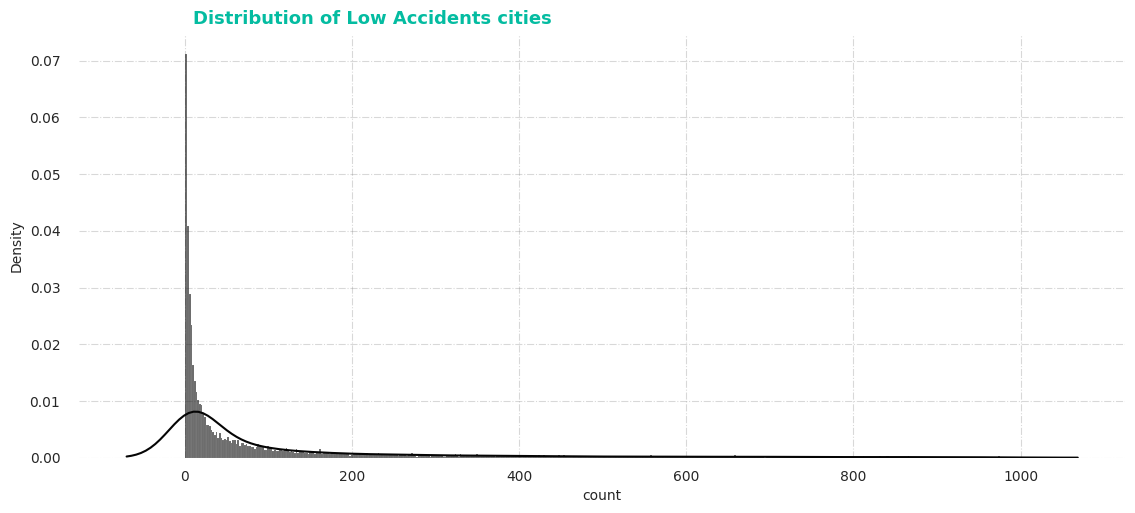

In [65]:
fig, ax = plt.subplots(figsize=(13.5, 5.5))

sns.histplot(
    low_accident_cities, kde=True,
    stat="density", kde_kws=dict(cut=2.5),
    alpha=0.6, edgecolor=(1, 1, 1, .4), color= '#050505',binwidth=2
)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(color='grey', linestyle='-.', linewidth=0.8, alpha=0.3)

plt.text(10, 0.0765, 'Distribution of Low Accidents cities',color='#04BCA1',fontsize=13, fontweight='bold')

####  
- 7.67% (1036 Cities) cities in US, have only 1 accident record in past 6 years.
- 91.5% (12,349 Cities) cities in US, have the road accident records (2017-2022), less than 1,000.
- There are more than 1151 Cities (8.5%) in US, which have more than 1,000 total no. of road accidents in past 6 years.
- Only 93 Cities (0.69%) in US, have more than 10,000 road accident records.
####     

## ANALYSIS ON STATES

In [190]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'Cases':'State', 'count':'Cases'})
state_df.head()

,State,Cases
0,CA,1484677
1,FL,807932
2,TX,511613
3,SC,364390
4,NC,319113


In [67]:
def convert(x): return us_states[x]
state_df['State'] = state_df['State'].apply(convert)
top_ten_states_name = list(state_df['State'].head(10))

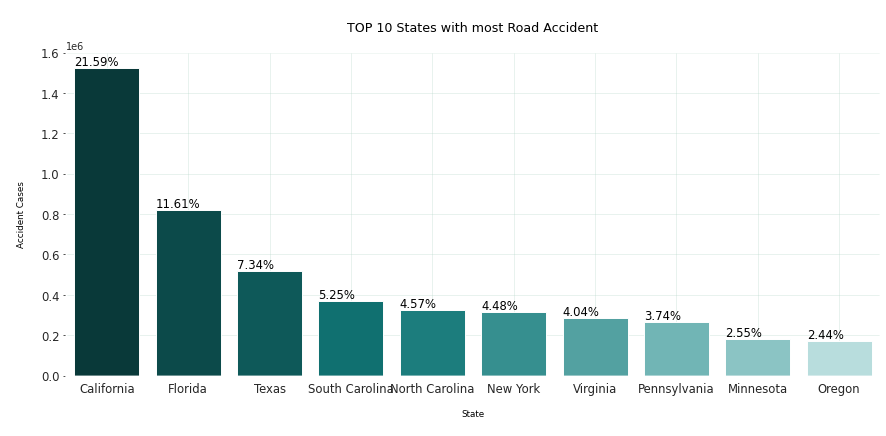

In [68]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+13000,\
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nTOP 10 States with most Road Accident\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nState\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=9, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

In [69]:
round(state_df['Cases'][0]/(6*365))

697

In [70]:
round(state_df['Cases'][0]/(6*365*24))

29

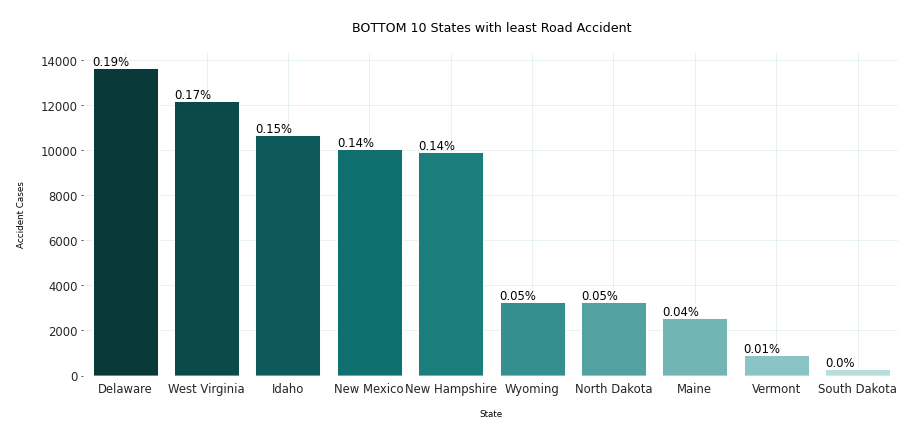

In [71]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=state_df['Cases'].tail(10), x=state_df['State'].tail(10), palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+120, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

plt.ylim(200, 15000)
plt.title('\nBOTTOM 10 States with least Road Accident\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nState\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=9, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

In [72]:
round(state_df['Cases'][48]/(6))

47

#### 
- In US, California is the state with highest no. of road accidents in past 6 years.
- About 21.6% of the total accident records of past 6 years in US is only from California.
- In past 6 years, averagely 697 accidents (daily) happened in California implies approximately 29 accidents per hour.
- Florida is the 2nd highest (11.61% cases) state for no. road accidents in US.
- South Dakota is the city with lowest no. of road accidents in past 6 years.
- Only 281 accidents took place in South Dakota in past 6 years implies yearly 47 cases in average.
####     

## ANALYSIS ON TIMEZONE

In [73]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'Cases':'Timezone', 'count':'Cases'})
timezone_df

,Timezone,Cases
0,US/Eastern,3309937
1,US/Pacific,1826620
2,US/Central,1516756
3,US/Mountain,410168
4,unknown,7459


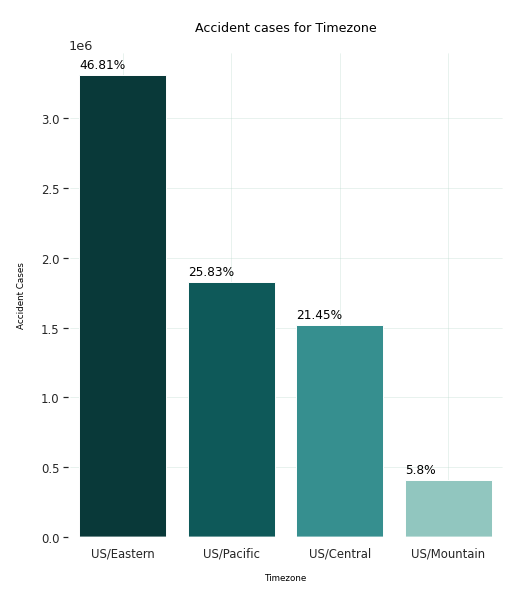

In [173]:
fig, ax = plt.subplots(figsize = (8,9), dpi = 70)
clrs = ['#014141','#016666','#279e9e','#88cfc5']

ax=sns.barplot(y=timezone_df['Cases'].head(4), x=timezone_df['Timezone'].head(4), palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+50000,\
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12.5,
                color='black')

plt.ylim(-20000, 350)
plt.title('\nAccident cases for Timezone\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nTimezone\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=9, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

####    
- Eastern time zone region of US has the highest no. of road accident cases (46.81%) in past 6 years.
- Mountain time zone region of US has the lowest no. of road accident cases (5.8%) in past 6 years.
####    

## ANALYSIS ON STREET

In [75]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'count':'Cases'})
street_df.head()

,Street,Cases
0,I-95 N,71863
1,I-95 S,69701
2,I-5 N,63582
3,I-10 E,49959
4,I-10 W,48620


In [183]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df['Cases']

0    71863
1    69701
2    63582
3    49959
4    48620
5    47871
6    34932
7    32226
8    27677
9    24795
Name: Cases, dtype: int64

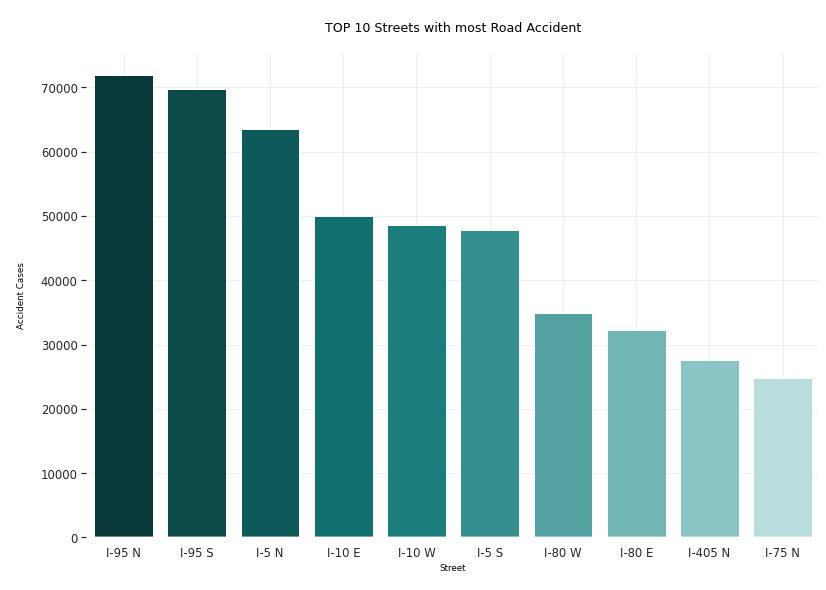

In [186]:
fig, ax = plt.subplots(figsize = (13.5,9), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street'], palette=clrs)
ax1 = ax.twinx()

plt.ylim(10, 10)
plt.title('\nTOP 10 Streets with most Road Accident\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('Street\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=9, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

In [78]:
round(street_df['Cases'][0]/(6*365))

33

In [79]:
street_df[street_df['Cases']==1].value_counts().sum()

125928

In [80]:
street_df[street_df['Cases']==1].value_counts().sum()*100/len(street_df)

38.87674582299115

In [81]:
street_df[street_df['Cases']<100].value_counts().sum()

314806

In [82]:
street_df[street_df['Cases']<100].value_counts().sum()*100/len(street_df)

97.18754244927698

In [83]:
street_df[street_df['Cases']>=1000].value_counts().sum()

739

In [84]:
street_df[street_df['Cases']>=1000].value_counts().sum()*100/len(street_df)

0.22814556860420604

In [85]:
street_df[street_df['Cases']>=10000].value_counts().sum()

57

In [86]:
street_df[street_df['Cases']>=10000].value_counts().sum()*100/len(street_df)

0.017597154817915756

####  
- In last 6 years Street No. I-95 N is having the highest road accidents records.
- In Street No. I-5 N, daily 33 accidents occurred in average.
- There are 125925 Streets (39%) in US which have only 1 accident record in past 6 years.
- 97% Streets of US, have less than 100 road accident cases.
- Only 0.23% Streets in US have the accident cases greater than 1000.
- In last 6 years record of road accidents, only 57 Streets (0.017%) have greater than 10000 cases.
####    

## ANALYSIS ON SEVERITY

In [87]:
severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'count':'Cases'})

In [88]:
severity_df['Cases']=severity_df['Cases']*100/len(df)
severity_df

,Severity,Cases
0,2,79.867500
1,3,16.590750
2,4,2.592215
3,1,0.949534


#### It Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

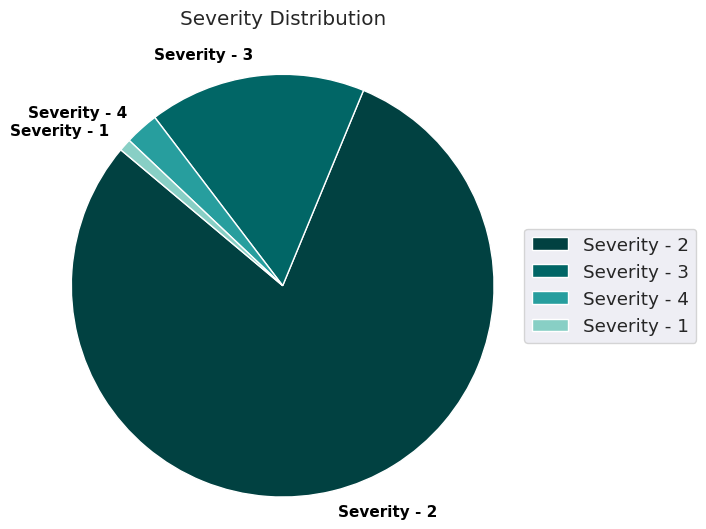

In [89]:
labels = ["Severity - 2", "Severity - 3", "Severity - 4", "Severity - 1"]
sizes = severity_df['Cases']
colors = ['#014141', '#016666', '#279e9e', '#88cfc5']

sns.set(font_scale=1.2, palette="Set3")

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='', startangle=140, pctdistance=0.90, 
        textprops={'color': 'black','size':11,'weight':'bold'})

# Add a legend on the left side
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title
plt.title('Severity Distribution\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

####   
- 79.87% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).
- In 2.6% Cases of road accidents, the impact on the traffic was highly Severe (Severity-4).

# TIME ANALYSIS

In [90]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id',0:'Duration'})
accident_duration_df

,Id,Duration
0,0,0 days 06:00:00
1,1,0 days 06:00:00
2,2,0 days 00:29:39
3,3,0 days 06:00:00
4,4,0 days 00:24:27
...,...,...
7070935,7070935,0 days 01:20:24
7070936,7070936,0 days 01:15:56
7070937,7070937,0 days 02:09:36
7070938,7070938,0 days 00:33:30


In [91]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac
                            = 1)).reset_index().rename(columns={'Cases':'Duration', 'count':'Cases'})
Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration
top_10_accident_duration_df

,Duration,Cases
0,00:29:47,51959
1,00:29:44,51287
2,06:00:00,242713
3,00:30:00,55998
4,00:29:46,52844
5,04:00:00,57126
6,00:29:45,53014
7,01:15:00,49709
8,00:29:43,50137
9,00:29:48,49733


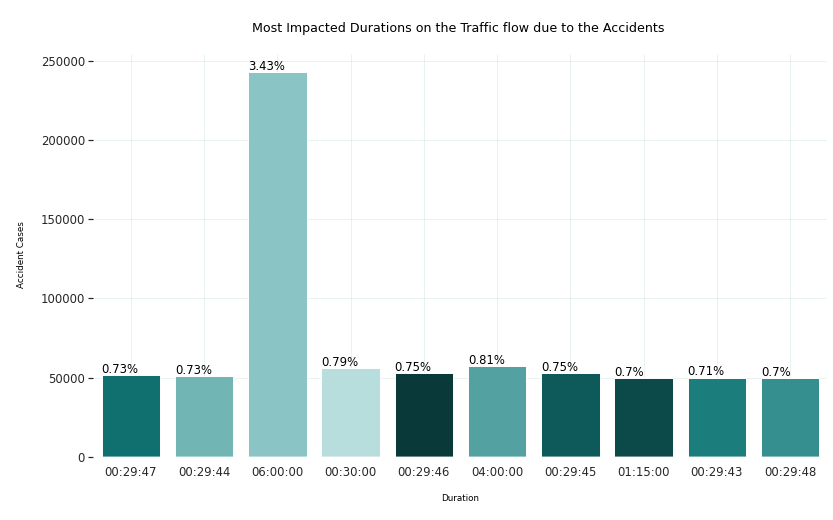

In [187]:
fig, ax = plt.subplots(figsize = (13.5,7.5), dpi = 70)
clrs = ['#008080','#66c0c0','#82cdcd','#b2e3e3','#014141','#46aeae','#016666','#015555','#0c8d8d','#279e9e']

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1300,\
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

plt.ylim(1000, 250000)
plt.title('\nMost Impacted Durations on the Traffic flow due to the Accidents \n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=9, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

#### From the above plot, it is inferred that majority (24.25%) of road accidents, have impacted on the traffic flow for 6 hours.
####    

## YEAR ANALYSIS

In [95]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'Start_Time':'Year',
        'count':'Cases'}).sort_values(by='Cases',ascending=True)
year_df

,Year,Cases
5,2017,718093
4,2018,893426
3,2019,954303
2,2020,1178913
1,2021,1563753
0,2022,1762452


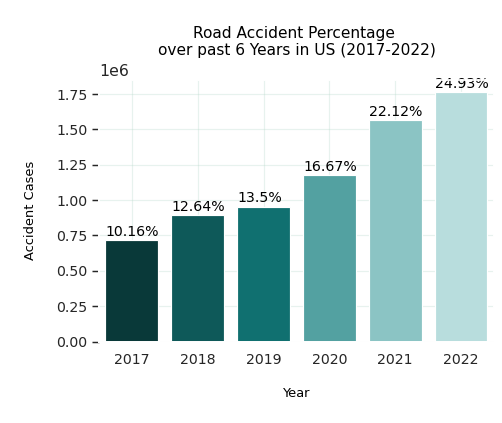

In [96]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 85)
clrs = ['#014141','#016666','#008080','#46aeae','#82cdcd','#b2e3e3']

ax=sns.barplot(y=year_df['Cases'].tail(10), x=year_df['Year'].tail(10), palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+30000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='black')

plt.ylim(200, 1800000)
plt.title('\nRoad Accident Percentage \nover past 6 Years in US (2017-2022)\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nYear\n', fontsize=11, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=11, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

####  
- From the above figure, it is clear that in last 6 years in US accidents percentage has increased significantly.
- 47% of the total road accident records of last 6 years happened only within last 2 years (2021, 2022).
####   

## YEAR ANALYSIS BASED ON SEVERITY

In [97]:
df['Year']=df.Start_Time.dt.year

In [100]:
pivot_df = df.groupby(['Severity', 'Year']).size().reset_index(name='Count') \
            .pivot_table(index='Severity', columns='Year', values='Count', fill_value=0)
pivot_df=round(pivot_df*100/len(df),2)
pivot_df

Year,2017,2018,2019,2020,2021,2022
Severity,,,,,,
1,0.00,0.00,0.00,0.40,0.00,0.54
2,6.54,8.13,9.73,13.21,19.58,22.68
3,3.27,4.14,3.36,2.62,2.09,1.10
4,0.34,0.36,0.40,0.44,0.44,0.61


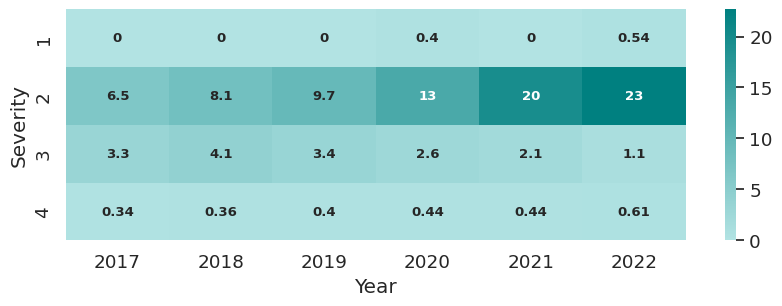

In [101]:
color1 = '#b2e3e3'
color2 = '#008080'

cmap_colors = [mcolors.to_rgba(color1), mcolors.to_rgba(color2)]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", cmap_colors, N=256)

plt.figure(figsize=(10, 3))
sns.heatmap(pivot_df,annot=True, cmap=custom_cmap, annot_kws={"fontsize": 9.5,'weight':'bold'})
plt.show()

####    
- In last 6 years (2017-2022) highly severe (Severity-4) accident cases in us nearly doubles(0.34% to 0.61%).
- Highest road accidents of last 6 years are moderately severe (Severity-2).
####   

## HOUR ANALYSIS

In [102]:
hour_df = df['Start_Time'].dt.hour.value_counts().reset_index().rename(columns={'Start_Time': 'Hours', 'count': 'Cases'})
hour_df= hour_df.sort_values(['Hours'])
hour_df

,Hours,Cases
20,0,103449
21,1,89861
22,2,86221
23,3,77078
18,4,150783
14,5,211924
7,6,376104
0,7,543552
2,8,531503
9,9,324456


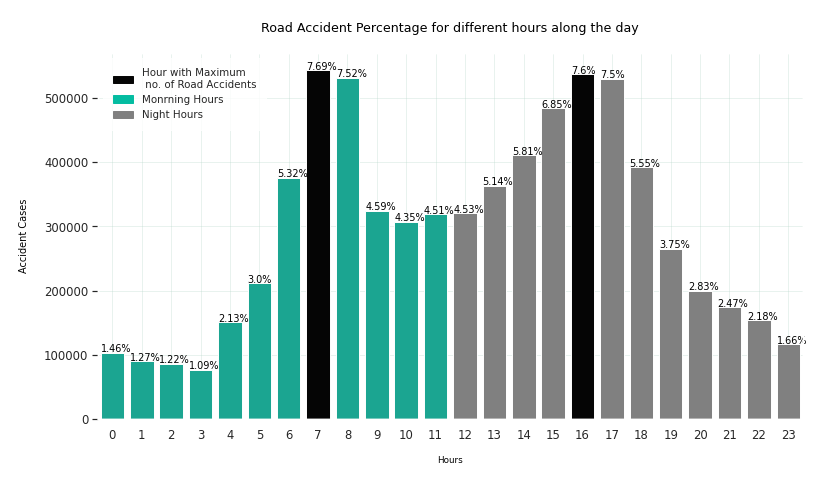

In [103]:
fig, ax = plt.subplots(figsize = (13,6.8), dpi = 70)
clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('#050505')
        else:
            clrs.append('#04BCA1')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('#050505')
        else:
            clrs.append('grey')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage for different hours along the day\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=9, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=10, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='#050505', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#04BCA1', label='Monrning Hours')
NI = mpatches.Patch(color='grey', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

####  
- Around 15.2% of the road accidents occurred in between 6:00AM to 9:00AM.
- In evening, around 15.1% of the road accidents occurred in between 3:00PM to 6:00PM.
- The most-deadliest accident hours are 4:00PM implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.
####  

## WEEK ANALYSIS

In [104]:
df.Start_Time.dt.dayofweek

0          6
1          6
2          6
3          6
4          6
          ..
7070935    5
7070936    5
7070937    5
7070938    5
7070939    5
Name: Start_Time, Length: 7070940, dtype: int32

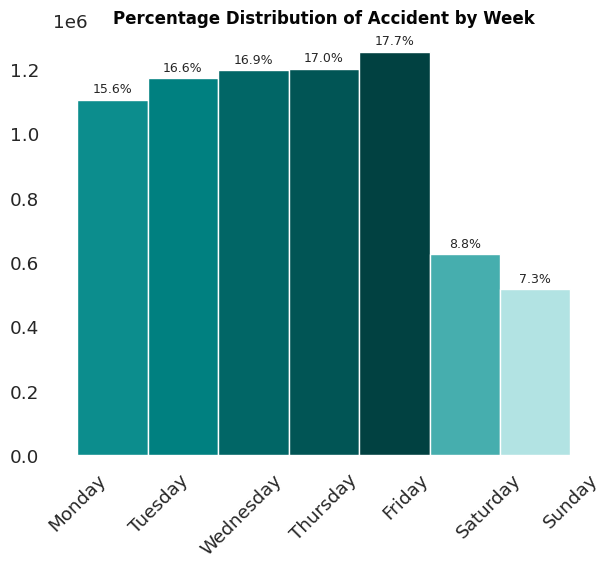

In [105]:
data = df.Start_Time.dt.dayofweek

color_palette = ['#0c8d8d', '#008080', '#016666', '#015555', '#014141', '#46aeae', '#b2e3e3']

# Customize plot appearance
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(7, 5.5)

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1,bins=7)

for i in range(0,7):
    patches[i].set_facecolor(color_palette[i])

day_counts = [int(count) for count in N]

total_count = len(data)
for bar, count in zip(patches, day_counts):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', 
                       xy=(bar.get_x() + bar.get_width() / 2, height), 
                       xytext=(0, 3),  # Adjust the vertical position of the text
                       textcoords='offset points',
                       ha='center', va='bottom',fontsize=9)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)

# Customize the x-axis labels (optional)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week, rotation=45)

plt.title('Percentage Distribution of Accident by Week',color='#050505',fontsize=12, fontweight='bold')
plt.show()

####    
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days.
- Only around 16% road accident records occurred in weekend.
- FRIDAY of a week is having the highest percentage of road accidents.
- On Sunday the percentage of road accidents in US is lowest.
####   

#### Is the distribution of accidents by hour the same on weekdays as on weekends?

In [106]:
Sundays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week==6]
Sundays_start_time

0         2017-01-01 00:00:26
1         2017-01-01 00:00:26
2         2017-01-01 00:03:31
3         2017-01-01 00:06:45
4         2017-01-01 00:09:26
                  ...        
7037553   2022-12-25 23:58:00
7037554   2022-12-25 23:58:00
7037555   2022-12-25 23:59:00
7037556   2022-12-25 23:59:24
7037557   2022-12-25 23:59:42
Name: Start_Time, Length: 515816, dtype: datetime64[ns]

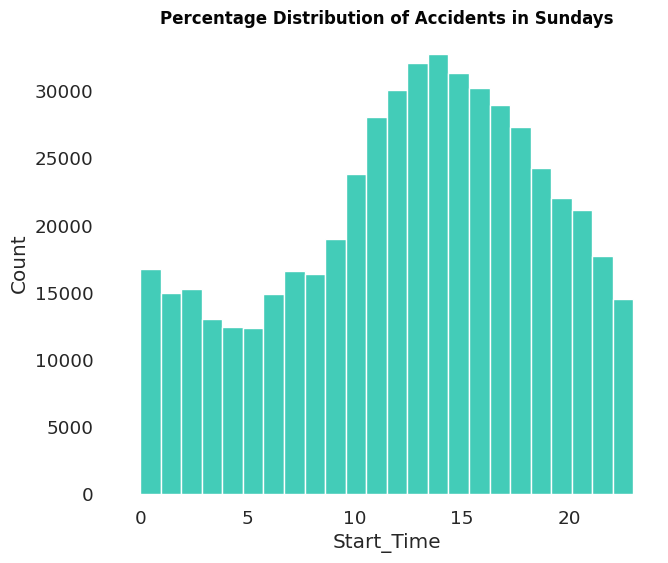

In [107]:
data = Sundays_start_time.dt.hour

fig, ax = plt.subplots(figsize=(7,6))

sns.histplot(data, color= '#04BCA1',bins=24, kde=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

plt.title('Percentage Distribution of Accidents in Sundays',color='#050505',fontsize=12, fontweight='bold')
plt.show()

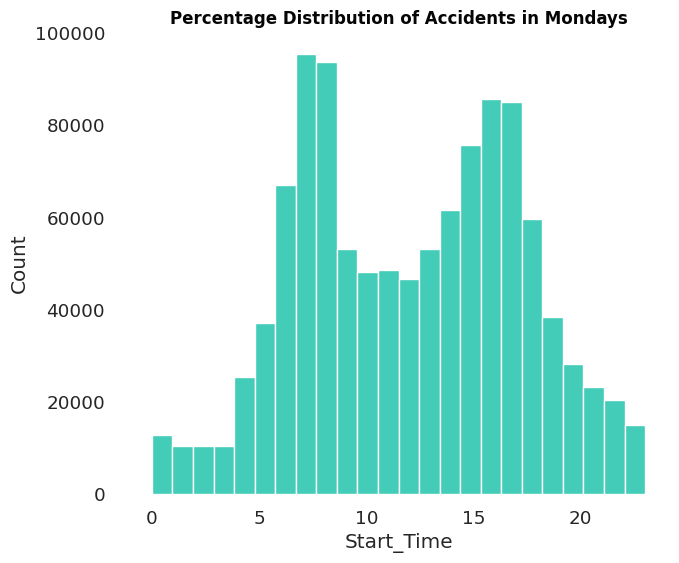

In [108]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week==0]
data = mondays_start_time.dt.hour

fig, ax = plt.subplots(figsize=(7,6))

sns.histplot(data, color= '#04BCA1',bins=24, kde=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')    
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

plt.title('Percentage Distribution of Accidents in Mondays',color='#050505',fontsize=12, fontweight='bold')
plt.show()

## MONTH ANALYSIS

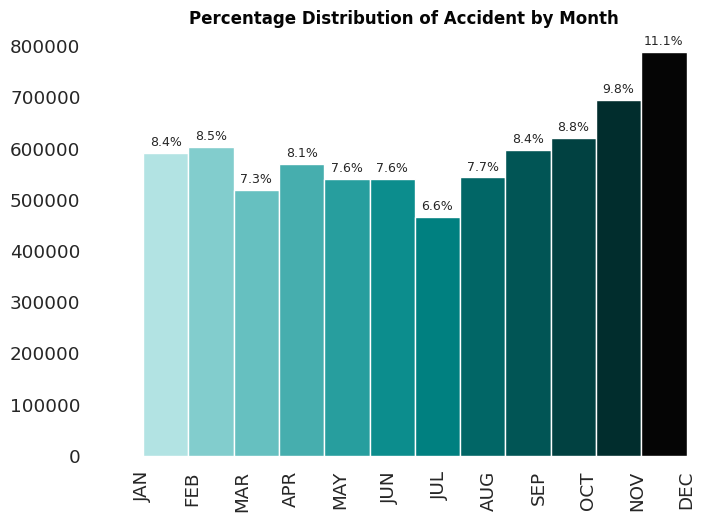

In [109]:
data =df.Start_Time.dt.month

color_palette =['#b2e3e3','#82cdcd','#66c0c0','#46aeae','#279e9e','#0c8d8d','#008080','#016666','#015555','#014141',
                '#012d2d','#050505']

# Customize plot appearance
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(8, 5.5)

N, bins, patches = ax.hist(data, linewidth=1,bins=12)

for i in range(0,12):
    patches[i].set_facecolor(color_palette[i])

day_counts = [int(count) for count in N]

total_count = len(data)
for bar, count in zip(patches, day_counts):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', 
                       xy=(bar.get_x() + bar.get_width() / 2, height), 
                       xytext=(0, 3),  # Adjust the vertical position of the text
                       textcoords='offset points',
                       ha='center', va='bottom',fontsize=9)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)

# Customize the x-axis labels (optional)
days_of_week = ['','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.xticks(range(13), days_of_week, rotation=90)

plt.title('Percentage Distribution of Accident by Month',color='#050505',fontsize=12, fontweight='bold')
plt.show()

####  
- Around 18% of the road accidents occurred in the month of December.
- July is month with least (3.54%) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months,October to December(i.e.,transition period from Autumn to Winter).
####   

## ANALYSIS BY ROAD CONDITIONS

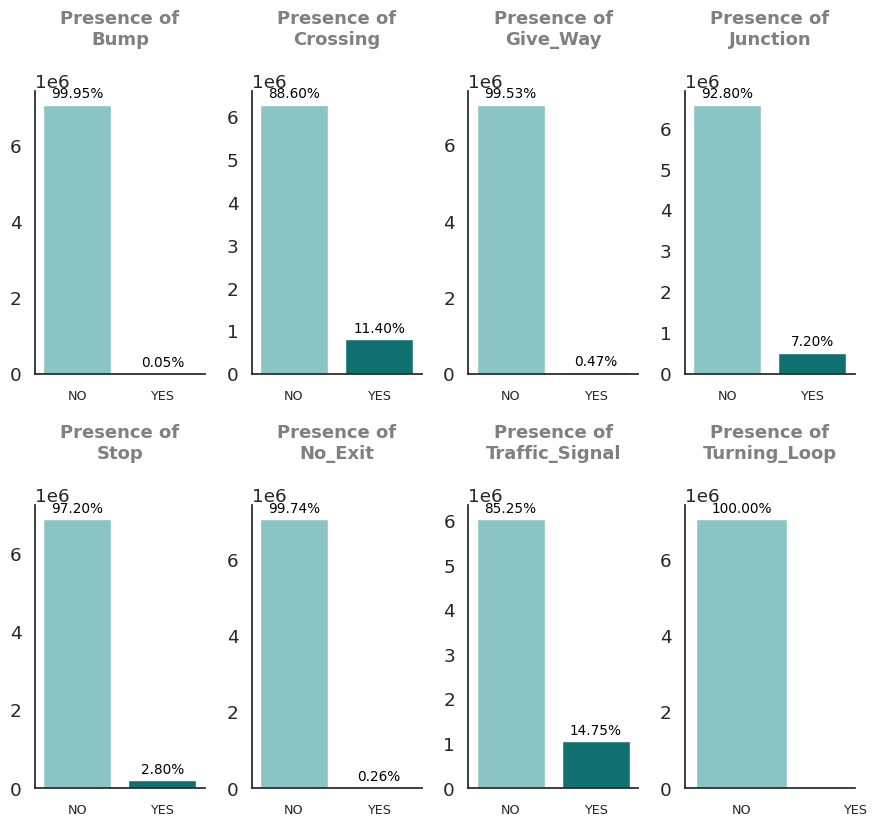

In [110]:
road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 8.5))
axes = axes.flatten()

# Custom colors
colors = ['#82cdcd', '#008080']

def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d})".format(pct, absolute)

# Iterate through road conditions
for i, condition in enumerate(road_conditions):
    ax = axes[i]
    
    # Count occurrences of each category (e.g., 'Yes' and 'No')
    data = df[condition].value_counts()
    
    # Create a bar chart
    sns.barplot(x=data.index, y=data.values, palette=colors, ax=ax)
    
    ax.set_title(f'Presence of\n{condition}\n', fontsize=13, color='Grey', fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Customize the x-axis labels (assuming 'Yes' and 'No' as labels)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['NO', 'YES'], fontsize=9.2)
    
    # Annotate the bars with percentages
    total_count = data.sum()
    for bar in ax.patches:
        height = bar.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # Adjust the vertical position of the text
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9.8, color='black', fontweight='light')
    for s in ['top','right']:
        ax.spines[s].set_visible(False)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.xaxis.set_tick_params(pad=5)

plt.tight_layout()
plt.show()

####  
- Almost in every case (99.95%) Bumper was absent in the accident spot.
- In 11.47% cases, road accidents happened near the crossing.
- In 97.20% cases, there were no Stop near the accident area.
- 7.20% road accident cases recorded near the junctions.
- There are no accident cases recorded near the Turning Loop.
- 14.75% road accident cases recorded near the traffic signal.
#### 

## WEATHER ANALYSIS

### TEMPERATURE ANALYSIS

In [168]:
# Convert 'unknown' values to NaN and then round the numeric values
df['Temperature(F)'] = pd.to_numeric(df['Temperature(F)'], errors='coerce')  # Convert 'unknown' to NaN
df['Temperature(F)'] = df['Temperature(F)'].apply(lambda x: round(x / 10) * 10 if not np.isnan(x) else np.nan)

In [169]:
Temp_df = pd.DataFrame(df['Temperature(F)'].value_counts()).reset_index().rename(columns={'count':'Cases'})
Temp_df['Cases']=round(Temp_df['Cases']*100/len(df),2)
Temp_df=Temp_df[Temp_df['Temperature(F)']!="unknown"].head(10)
Temp_df=Temp_df.sort_values(by='Temperature(F)',ascending=True)

In [170]:
value_mapping = {100:'95-105', 90: '85-95', 80:'75-85', 70: '65-75',60:'55-65', 50: '45-55',40:'35-45',
                 30: '25-35',20:'15-25',0:'-05-05'}
Temp_df['Temperature(F)'] = Temp_df['Temperature(F)'].replace(value_mapping)
Temp_df

,Temperature(F),Cases
7,-05-05,2.51
8,15-25,2.48
6,25-35,5.79
4,35-45,10.10
3,45-55,12.59
1,55-65,19.32
2,65-75,18.23
0,75-85,19.51
5,85-95,7.24
9,95-105,1.28


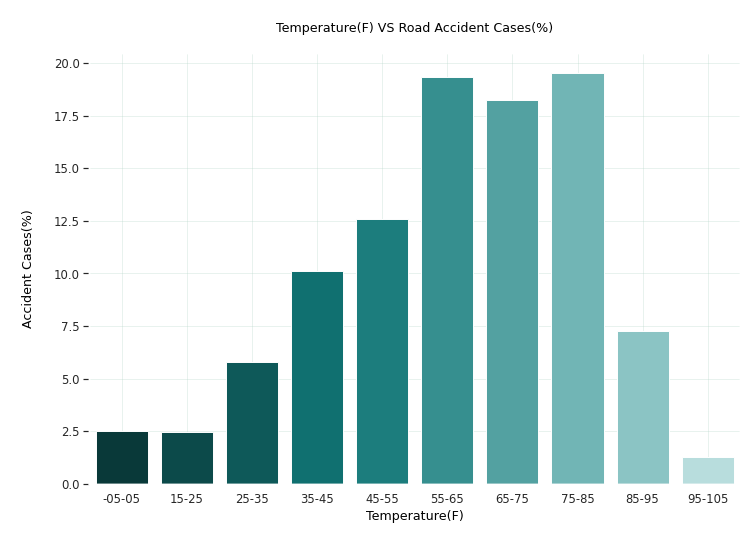

In [188]:
fig, ax = plt.subplots(figsize = (12,8), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=Temp_df['Cases'], x=Temp_df['Temperature(F)'], palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
plt.ylim(10, 10)
plt.title('\nTemperature(F) VS Road Accident Cases(%)\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('Temperature(F)\n', fontsize=13, color='black')
ax.set_ylabel('\nAccident Cases(%)\n', fontsize=13, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

####  In the temperature range of 55(F) - 85(F), 56% of the road accidents occurred.
####   

### HUMIDITY ANALYSIS

In [153]:
# Convert 'unknown' values to NaN and then round the numeric values
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')  # Convert 'unknown' to NaN
df['Humidity(%)'] = df['Humidity(%)'].apply(lambda x: round(x / 10) * 10 if not np.isnan(x) else np.nan)

In [154]:
df['Humidity(%)'].sort_values(ascending=True)

1343048      0
5926798      0
2665938      0
2665936      0
6229810      0
          ... 
1736534    100
1736530    100
4410116    100
1736524    100
2692214    100
Name: Humidity(%), Length: 7070940, dtype: int64

In [156]:
H_df = pd.DataFrame(df['Humidity(%)'].value_counts()).reset_index().rename(columns={'count':'Cases'})
H_df['Cases']=round(H_df['Cases']*100/len(df),2)
H_df

,Humidity(%),Cases
0,80,15.75
1,90,15.73
2,60,14.70
3,70,12.45
4,50,10.59
5,40,10.07
6,100,7.02
7,30,5.74
8,20,4.15
9,0,2.24


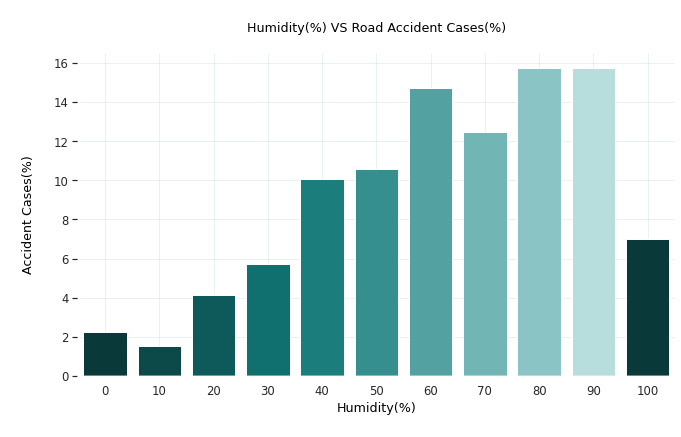

In [189]:
fig, ax = plt.subplots(figsize = (11,6), dpi = 70)
clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']

ax=sns.barplot(y=H_df['Cases'], x=H_df['Humidity(%)'], palette=clrs)
ax1 = ax.twinx()

total = df.shape[0]
plt.ylim(10, 10)
plt.title('\nHumidity(%) VS Road Accident Cases(%)\n', size=13, color='black')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('Humidity(%)\n', fontsize=13, color='black')
ax.set_ylabel('\nAccident Cases(%)\n', fontsize=13, color='black')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

#### In maximum cases (15.74%) of road accident, the humidity range is between 80% - 90%.
####   

In [159]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns=
                                                                    {'count':'Cases'})

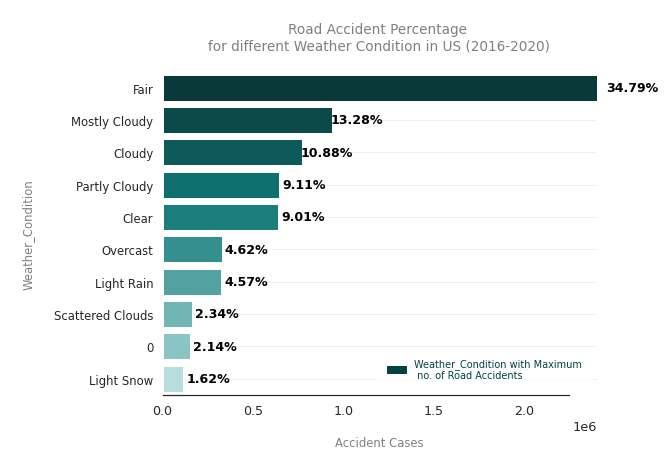

In [166]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)

clrs = ['#014141','#015555','#016666','#008080','#0c8d8d','#279e9e','#46aeae','#66c0c0','#82cdcd','#b2e3e3']
ax=sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette=clrs)

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+138000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=13, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2020)\n', size=14, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=12, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=12, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 2400000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 2250000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Weather_Condition with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=[clrs[0]], edgecolor='white');

#### In most of the cases (34.8%) the weather was Fair and approximately in 13.25% cases it was mostly cloudy.

####  

# INSIGHTS (SUMMARY AND CONCLUSION)
- Despite being the most populated, New York is at 44th place in accidents.
- In past 6 years (2017-2022) yearly 29422 road accidents (average) happened in Miami.
- In Miami averagely in every 24 hours 81 accidents occurred.
- 7.67% (1036 Cities) cities in US, have only 1 accident record in past 6 years.
- 91.5% (12,349 Cities) cities in US, have the road accident records (2017-2022), less than 1,000.
- There are more than 1151 Cities (8.5%) in US, which have more than 1,000 total no. of road accidents in past 6 years.
- Only 93 Cities (0.69%) in US, have more than 10,000 road accident records.
- In US, California is the state with highest no. of road accidents in past 6 years.
- About 21.6% of the total accident records of past 6 years in US is only from California.
- In past 6 years, averagely 697 accidents (daily) happened in California implies approximately 29 accidents per hour.
- Florida is the 2nd highest (11.61% cases) state for no. road accidents in US.
- South Dakota is the city with lowest no. of road accidents in past 6 years.
- Only 281 accidents took place in South Dakota in past 6 years implies yearly 47 cases in average.
- Eastern time zone region of US has the highest no. of road accident cases (46.81%) in past 6 years.
- Mountain time zone region of US has the lowest no. of road accident cases (5.8%) in past 6 years.
- In last 6 years Street No. I-95 N is having the highest road accidents records.
- In Street No. I-5 N, daily 33 accidents occurred in average.
- There are 125925 Streets (39%) in US which have only 1 accident record in past 6 years.
- 97% Streets of US, have less than 100 road accident cases.
- Only 0.23% Streets in US have the accident cases greater than 1000.
- In last 6 years record of road accidents, only 56 Streets (0.017%) have greater than 10000 cases.
- 79.87% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).
- In 2.6% Cases of road accidents, the impact on the traffic was highly Severe (Severity-4).
- It is inferred that majority (24.25%) of road accidents, have impacted on the traffic flow for 6 hours.
- From the above figure, it is clear that in last 6 years in US accidents percentage has increased significantly.
- 47% of the total road accident records of last 6 years happened only within last 2 years (2021, 2022).
- In last 6 years (2017-2022) highly severe (Severity-4) accident cases in us nearly doubles(0.34% to 0.61%).
- Highest road accidents of last 6 years are moderately severe (Severity-2).
- Around 15.2% of the road accidents occurred in between 6:00AM to 9:00AM.
- In evening, around 15.1% of the road accidents occurred in between 3:00PM to 6:00PM.
- The most-deadliest accident hours are 4:00PM implies the Evening Office-Returning Hours.
- The 2nd most-deadliest accident hour is 8:00AM implies the Morning Office-Going Hours.
- Working Days of the week have almost 2 times higher accident percentage, compared with the Weekend Days.
- Only around 16% road accident records occurred in weekend.
- FRIDAY of a week is having the highest percentage of road accidents.
- On Sunday the percentage of road accidents in US is lowest.
- Around 18% of the road accidents occurred in the month of December.
- July is month with least (3.54%) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months,October to December(i.e.,transition period from Autumn to Winter).
- Almost in every case (99.95%) Bumper was absent in the accident spot.
- In 11.47% cases, road accidents happened near the crossing.
- In 97.20% cases, there were no Stop near the accident area.
- 7.20% road accident cases recorded near the junctions.
- There are no accident cases recorded near the Turning Loop.
- 14.75% road accident cases recorded near the traffic signal.
- In the temperature range of 65(F) - 95(F), 56% of the road accidents occurred.
- In maximum cases (15.39%) of road accident, the humidity range is between 81% - 91%.
- In most of the cases (34.8%) the weather was Fair and approximately in 13.25% cases it was mostly cloudy.